# **Lab 5: Multi-Class Classification**


## Exercise 1: Multi-class Classification with Decision Tree

In this exercise, you will train a multi-class classifier using Decision Tree.

We are going to use a dataset from the UCI Machine Learning Repository which contains a dataset about car evaluation (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation). This dataset contains the state of second hand cars and their categories: "**evaluation**" column.

You will have to import the dataset from the following link:
https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex1/car_evaluation.csv

The steps are:
1.   Load and explore dataset
2.   Data preparation
3.   Split datasets
4.   Assess baseline model
5.   Train Decision Tree with Default Hyperparameters
6.   Reduce Overfitting with min_sample_split
7.   Reduce Further Overfitting with max_depth
8.   Assess model on Testing Set

---
### 0. Setup Environment

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

lab = LabExFolder(
  course_code="36106",
  lab="lab05",
  exercise="ex01"
)
lab.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/36106/labs/lab05/ex01/data


In [2]:
import warnings
warnings.simplefilter(action='ignore')

## 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy packages

In [3]:
# Placeholder for student's code

In [4]:
# Solution
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [5]:
# Placeholder for student's code

In [6]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex1/car_evaluation.csv'
df = pd.read_csv(file_url)

**[1.3]** Display the first 5 rows of df

In [7]:
# Placeholder for student's code

In [8]:
# Solution
df.head()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**[1.4]** Display the dimensions (shape) of df

In [9]:
# Placeholder for student's code

In [10]:
# Solution
df.shape

(1728, 7)

**[1.5]** Display the summary (info) of df

In [11]:
# Placeholder for student's code

In [12]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying_price      1728 non-null   object
 1   maintenance_cost  1728 non-null   object
 2   doors             1728 non-null   object
 3   persons_capacity  1728 non-null   object
 4   luggage_boot      1728 non-null   object
 5   safety            1728 non-null   object
 6   evaluation        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**[1.6]** Display the descriptive statictics of df


In [13]:
# Placeholder for student's code

In [14]:
# Solution
df.describe()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


**[1.7]** Create a for loop that will iterate through each columns and print their list of unique values

In [15]:
# Placeholder for student's code

In [16]:
# Solution:
for col in df.columns:
  print(col)
  print(df[col].unique())

buying_price
['vhigh' 'high' 'med' 'low']
maintenance_cost
['vhigh' 'high' 'med' 'low']
doors
['2' '3' '4' '5more']
persons_capacity
['2' '4' 'more']
luggage_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
evaluation
['unacc' 'acc' 'vgood' 'good']


## 2. Data Preparation

**[2.1]** Create a copy of df and save it into a variable called df_cleaned

In [17]:
# Placeholder for student's code

In [18]:
# Solution
df_cleaned = df.copy()

**[2.2]** Import OrdinalEncoder from sklearn.preprocessing

In [19]:
# Placeholder for student's code

In [20]:
# Solution
from sklearn.preprocessing import OrdinalEncoder

**[2.3]** Create a list called 'buying_price_categories' containing the list of values ordered from the smallest to the highest

Note: It has to be a list of list

In [21]:
# Placeholder for student's code

In [22]:
# Solution
buying_price_cats = [['low', 'med', 'high', 'vhigh']]

**[2.4]** Instantiate the OrdinalEncoder class with 'buying_price_cats' as categories and save it into a variable called buying_price_enc

In [23]:
# Placeholder for student's code

In [24]:
# Solution
buying_price_enc = OrdinalEncoder(categories=buying_price_cats)

**[2.5]** Use our trained encoder to transform this column

In [25]:
# Placeholder for student's code

In [26]:
# Solution
df_cleaned['buying_price_encoded'] = buying_price_enc.fit_transform(df_cleaned[['buying_price']])

**[2.6]** Display the columns 'buying_price','buying_price_encoded'

In [27]:
# Placeholder for student's code

In [28]:
# Solution
df_cleaned[['buying_price','buying_price_encoded']]

,buying_price,buying_price_encoded
0,vhigh,3.0
1,vhigh,3.0
2,vhigh,3.0
3,vhigh,3.0
4,vhigh,3.0
...,...,...
1723,low,0.0
1724,low,0.0
1725,low,0.0
1726,low,0.0


**[2.7]** Replace the values of 'buying_price' with its encoded version and remove the 'buying_price_encoded' column

In [29]:
# Placeholder for student's code

In [30]:
# Solution
df_cleaned['buying_price'] = df_cleaned['buying_price_encoded']
df_cleaned.drop('buying_price_encoded', axis=1, inplace=True)

**[2.8]** Repeat the same process to convert 'maintenance_cost' into index mapping

In [31]:
# Placeholder for student's code

In [32]:
# Solution
maintenance_cost_cats = [['low', 'med', 'high', 'vhigh']]
maintenance_cost_enc = OrdinalEncoder(categories=maintenance_cost_cats)
df_cleaned['maintenance_cost'] = maintenance_cost_enc.fit_transform(df_cleaned[['maintenance_cost']])

**[2.9]** Create a dictionay for the remaining categorical variables containing their list of values

In [33]:
# Placeholder for student's code

In [34]:
# Solution
cats_dict = {
    'doors': [['2', '3', '4', '5more']],
    'persons_capacity': [['2', '4', 'more']],
    'luggage_boot': [['small', 'med', 'big']],
    'safety': [['low', 'med', 'high']]
}
cats_dict

{'doors': [['2', '3', '4', '5more']],
 'persons_capacity': [['2', '4', 'more']],
 'luggage_boot': [['small', 'med', 'big']],
 'safety': [['low', 'med', 'high']]}

**[2.10]** Create a for loop that iterates 'cats_dict' and transform each column into ordinal type

In [35]:
# Placeholder for student's code

In [36]:
# Solution
for col, cats in cats_dict.items():
  col_encoder = OrdinalEncoder(categories=cats)
  df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])

**[2.11]** Print the first 5 rows of df_cleaned

In [37]:
# Placeholder for student's code

In [38]:
# Solution
df_cleaned.head()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,3.0,3.0,0.0,0.0,0.0,0.0,unacc
1,3.0,3.0,0.0,0.0,0.0,1.0,unacc
2,3.0,3.0,0.0,0.0,0.0,2.0,unacc
3,3.0,3.0,0.0,0.0,1.0,0.0,unacc
4,3.0,3.0,0.0,0.0,1.0,1.0,unacc


## 3. Split datasets

Note: If you are stuck in previous steps, you can dowload the content of df_cleaned here: 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex1/df_cleaned.csv'

**[3.1]** Split the data into feature **X** and target **y**:

In [39]:
# Placeholder for student's code

In [40]:
# Solution:
y = df_cleaned.pop('evaluation')
X = df_cleaned

**[3.2]** Print the number of occurence for each value of the target
variable

In [41]:
# Placeholder for student's code

In [42]:
# Solution:
y.value_counts()

,count
evaluation,
unacc,1210
acc,384
good,69
vgood,65


**[3.3]** Print the frequencies of each value of the target variable

In [43]:
# Placeholder for student's code

In [44]:
# Solution:
y.value_counts(normalize=True)

,proportion
evaluation,
unacc,0.700231
acc,0.222222
good,0.039931
vgood,0.037616


**[3.4]** Import train_test_split from sklearn.model_selection

In [45]:
# Placeholder for student's code

In [46]:
# Solution:
from sklearn.model_selection import train_test_split

**[3.5]** Split the dataset into 2 different sets: data (80%) and test (20%)

In [47]:
# Placeholder for student's code

In [48]:
# Solution:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

**[3.6]** Print the frequencies of each value of the testing target

In [49]:
# Placeholder for student's code

In [50]:
# Solution:
y_test.value_counts(normalize=True)

,proportion
evaluation,
unacc,0.710983
acc,0.196532
vgood,0.052023
good,0.040462


**[3.7]** Split the data randomly into 2 different sets: training (80%) and validation (20%)

In [51]:
# Placeholder for student's code

In [52]:
# Solution:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

**[3.8]** Print the frequencies of each value of the validation target

In [53]:
# Placeholder for student's code

In [54]:
# Solution:
y_val.value_counts(normalize=True)

,proportion
evaluation,
unacc,0.685921
acc,0.249097
good,0.043321
vgood,0.021661


**[3.9]** Print the frequencies of each value of the training target

In [55]:
# Placeholder for student's code

In [56]:
# Solution:
y_train.value_counts(normalize=True)

,proportion
evaluation,
unacc,0.700452
acc,0.223529
good,0.038914
vgood,0.037104


## 4. Assess Baseline Model

Note: If you are stuck in previous steps, you can dowload the content of the sets here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab05/ex1

**[4.1]** Import the DummyClassifier module from sklearn

In [57]:
# Placeholder for student's code

In [58]:
# Solution
from sklearn.dummy import DummyClassifier

**[4.2]** Instantiate the Dummy class into a variable called `base_clf` and fit it on the training set it

In [59]:
# Placeholder for student's code

In [60]:
# Solution
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

**[4.3]** Import the accuracy and f1 scores from sklearn

In [61]:
# Placeholder for student's code

In [62]:
# Solution
from sklearn.metrics import accuracy_score, f1_score

**[4.4]** Display the accuracy and f1 scores of this baseline model on the training set

In [63]:
# Placeholder for student's code

In [64]:
# Solution
y_preds = base_clf.predict(X_train)
print(accuracy_score(y_train, y_preds))
print(f1_score(y_train, y_preds, average='weighted'))

0.7004524886877828
0.5770625079769494


## 5. Train Decision Tree with Default Hyperparameters

**[5.1]** Import DecisionTreeClassifier from sklearn.tree

In [65]:
# Placeholder for student's code

In [66]:
# Solution
from sklearn.tree import DecisionTreeClassifier

**[5.2]** Instantiate a DecisionTreeClassifier() model with random_state=8 parameter in order to keep our results consistent

In [67]:
# Placeholder for student's code

In [68]:
# Solution
tree_1 = DecisionTreeClassifier(random_state=8)

**[5.3]** Train the model on the training set


In [69]:
# Placeholder for student's code

In [70]:
# Solution
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

**[5.4]** Save its predictions from the training and validation sets on 2 different variables

In [71]:
# Placeholder for student's code

In [72]:
# Solution:
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[5.5]** Import the accuracy and f1 scores from sklearn

In [73]:
# Placeholder for student's code

In [74]:
# Solution:
from sklearn.metrics import accuracy_score, f1_score

**[5.6]** Create a confusion matrix on the training set

In [75]:
# Placeholder for student's code

In [76]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

1.0
0.9530685920577617


**[5.7]** Print the f1 score of the training and validation sets

In [77]:
# Placeholder for student's code

In [78]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

1.0
0.9514698149370076


## 6. Reduce Overfitting with min_samples_split

**[6.1]** Train a DecisionTree model with min_samples_split=5 and save the predictions from the training and validation sets

In [79]:
# Placeholder for student's code

In [80]:
# Solution
tree_split_1 = DecisionTreeClassifier(random_state=8, min_samples_split=5).fit(X_train, y_train)
y_train_preds = tree_split_1.predict(X_train)
y_val_preds = tree_split_1.predict(X_val)

**[6.2]** Print the accuracy score of the training and validation sets

In [81]:
# Placeholder for student's code

In [82]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9936651583710407
0.9350180505415162


**[6.3]** Print the f1 score of the training and validation sets

In [83]:
# Placeholder for student's code

In [84]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9936436112906702
0.9305983184325318


**[6.4]** Train a DecisionTree model with min_samples_split=10 and save the predictions from the training and validation sets

In [85]:
# Placeholder for student's code

In [86]:
# Solution
tree_split_2 = DecisionTreeClassifier(random_state=8, min_samples_split=10).fit(X_train, y_train)
y_train_preds = tree_split_2.predict(X_train)
y_val_preds = tree_split_2.predict(X_val)

**[6.5]** Print the accuracy score of the training and validation sets

In [87]:
# Placeholder for student's code

In [88]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9755656108597285
0.9350180505415162


**[6.6]** Print the f1 score of the training and validation sets

In [89]:
# Placeholder for student's code

In [90]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9759054271396286
0.9345459615217049


**[6.7]** Train a DecisionTree model with min_samples_split=20 and save the predictions from the training and validation sets

In [91]:
# Placeholder for student's code

In [92]:
# Solution
tree_split_3 = DecisionTreeClassifier(random_state=8, min_samples_split=20).fit(X_train, y_train)
y_train_preds = tree_split_3.predict(X_train)
y_val_preds = tree_split_3.predict(X_val)

**[6.8]** Print the accuracy score of the training and validation sets

In [93]:
# Placeholder for student's code

In [94]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9547511312217195
0.9097472924187726


**[6.9]** Print the f1 score of the training and validation sets

In [95]:
# Placeholder for student's code

In [96]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9543801957749164
0.9093570629589038


**[6.10]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [97]:
# Placeholder for student's code

In [98]:
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[6.11]** Print the confusion matrices for the training and validation sets for tree_split_2 model

In [99]:
# Placeholder for student's code

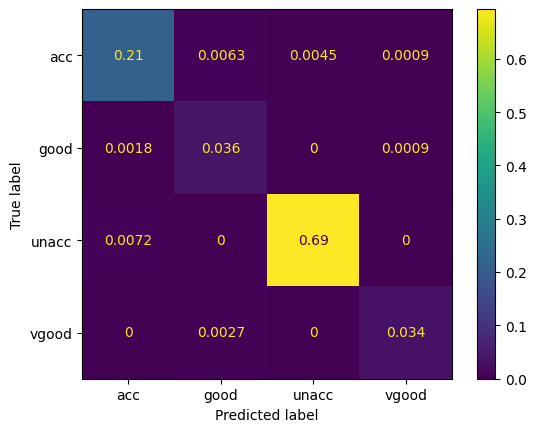

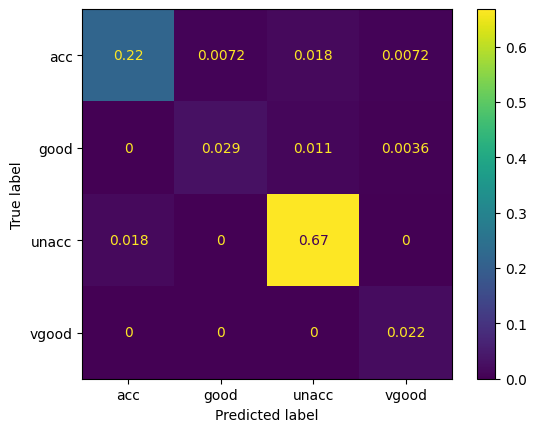

In [100]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_train, y_train, normalize='all')
ConfusionMatrixDisplay.from_estimator(tree_split_2, X_val, y_val, normalize='all')

## 7. Reduce Further Overfitting with max_depth

**[7.1]** Let's have a look at what is the current value for this hyperparameter

In [101]:
# Placeholder for student's code

In [102]:
# Solution
tree_split_2.tree_.max_depth

9

**[7.2]** Train a DecisionTree model with min_samples_split=10, max_depth=3 and save the predictions from the training and validation sets

In [103]:
# Placeholder for student's code

In [104]:
# Solution
tree_depth_1 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=3).fit(X_train, y_train)
y_train_preds = tree_depth_1.predict(X_train)
y_val_preds = tree_depth_1.predict(X_val)

**[7.3]** Print the accuracy score of the training and validation sets bold text

In [105]:
# Placeholder for student's code

In [106]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.7873303167420814
0.8122743682310469


**[7.4]** Print the f1 score of the training and validation sets

In [107]:
# Placeholder for student's code

In [108]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.7523072475889013
0.7803401763744455


**[7.5]** Train a DecisionTree model with min_samples_split=10, max_depth=8 and save the predictions from the training and validation sets

In [109]:
# Placeholder for student's code

In [110]:
# Solution
tree_depth_2 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=8).fit(X_train, y_train)
y_train_preds = tree_depth_2.predict(X_train)
y_val_preds = tree_depth_2.predict(X_val)

**[7.6]** Print the accuracy score of the training and validation sets

In [111]:
# Placeholder for student's code

In [112]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9737556561085973
0.9314079422382672


**[7.7]** Print the f1 score of the training and validation sets

In [113]:
# Placeholder for student's code

In [114]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9743976508282421
0.9311075272124858


**[7.8]** Train a DecisionTree model with min_samples_split=10, max_depth=6 and save the predictions from the training and validation sets

In [115]:
# Placeholder for student's code

In [116]:
# Solution
tree_depth_3 = DecisionTreeClassifier(random_state=8, min_samples_split=10, max_depth=6).fit(X_train, y_train)
y_train_preds = tree_depth_3.predict(X_train)
y_val_preds = tree_depth_3.predict(X_val)

**[7.9]** Print the accuracy score of the training and validation sets

In [117]:
# Placeholder for student's code

In [118]:
# Solution:
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9375565610859729
0.924187725631769


**[7.10]** Print the f1 score of the training and validation sets

In [119]:
# Placeholder for student's code

In [120]:
# Solution:
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9396385300644613
0.9284164017457837


**[7.11]** Print the confusion matrices for the training and validation sets for tree_depth_3 model

In [121]:
# Placeholder for student's code

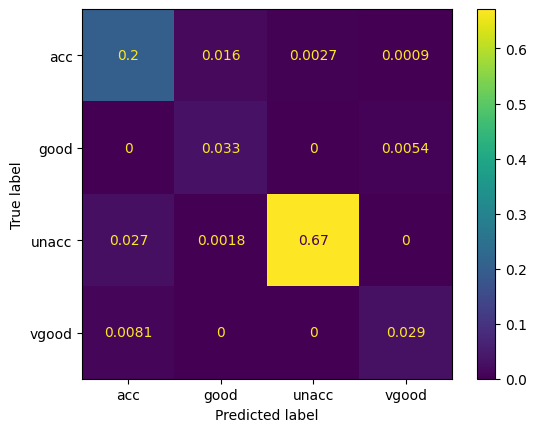

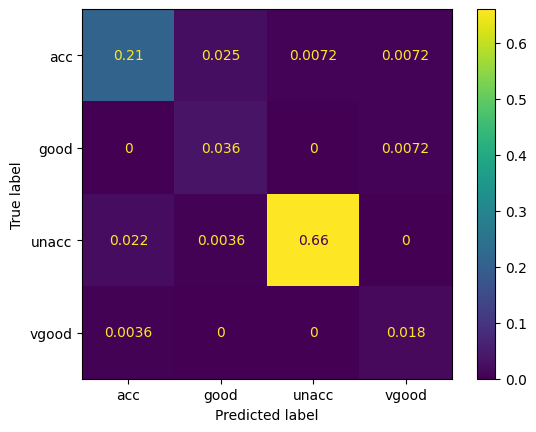

In [122]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_train, y_train, normalize='all')
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_val, y_val, normalize='all')

## 8. Assess model on Testing Set

**[8.1]** Print the accuracy and f1 scores of our best model on the testing set

In [123]:
# Placeholder for student's code

In [124]:
# Solution:
y_test_preds = tree_depth_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9335260115606936
0.9361554858164549


**[8.2]** Print the confusion matrix for this model on the testing set

In [125]:
# Placeholder for student's code

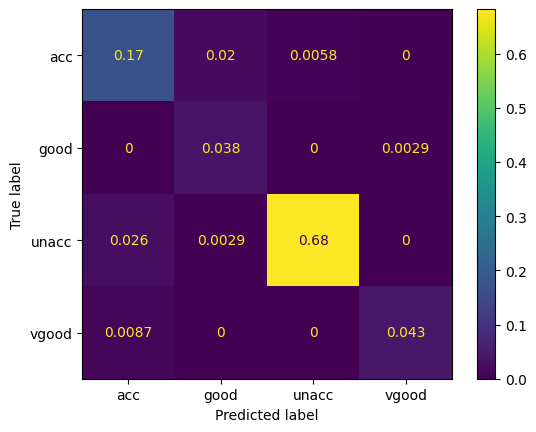

In [126]:
# Solution
ConfusionMatrixDisplay.from_estimator(tree_depth_3, X_test, y_test, normalize='all')